In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import json

In [2]:
def read_data(filename):
    with open(filename) as f:
        data = f.readlines()
    
    data = [np.array(json.loads(item)) for item in data]
    return data

In [3]:
task_name = "CommonGEN"

In [4]:
mle_bleu = read_data(f"{task_name}/Quality-Diversity/mle_bleu.txt")
textgail_bleu = read_data(f"{task_name}/Quality-Diversity/textgail_bleu.txt")
mle_distinct = read_data(f"{task_name}/Quality-Diversity/mle_distinct.txt")
textgail_distinct = read_data(f"{task_name}/Quality-Diversity/textgail_distinct.txt")


## BLEU-2 vs Distinct-2

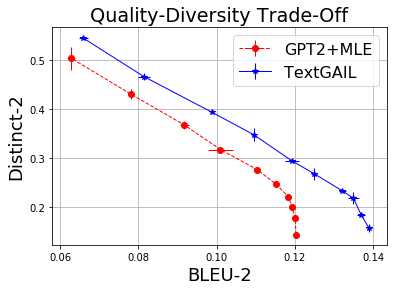

In [5]:
fig=plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams.update({'font.size': 16})
# ax.scatter(np.array(mle_bleu), np.array(mle_distinct), color='r')
# ax.plot(np.array(mle_bleu), np.array(mle_distinct), '-o', color='r')

ax.errorbar(np.mean(mle_bleu, axis=0), np.mean(mle_distinct, axis=0), xerr=np.std(mle_bleu, axis=0), yerr=np.std(mle_distinct, axis=0), \
            marker='o', color='r', elinewidth=1, linewidth=1, linestyle="--")
# ax.scatter(np.array(textgail_bleu), np.array(textgail_distinct), color='b')
ax.errorbar(np.mean(textgail_bleu, axis=0), np.mean(textgail_distinct, axis=0), xerr=np.std(textgail_bleu, axis=0), yerr=np.std(textgail_distinct, axis=0), \
            marker='*', color='b', elinewidth=1, linewidth=1)


ax.set_xlabel('BLEU-2', fontsize=18)
ax.set_ylabel('Distinct-2', fontsize=18)
ax.set_title(f'Quality-Diversity Trade-Off')
ax.legend(["GPT2+MLE", "TextGAIL"])
ax.grid("on")

fig.savefig(f"{task_name}_qd-tradeoff.png", dpi=300, pad_inches=0.1, bbox_inches='tight')

In [6]:
# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])

# for i in range(3):
#     ax.scatter(mle_bleu[i], mle_distinct[i], color='r')

# for i in range(3):
#     ax.scatter(textgail_bleu[i], textgail_distinct[i], color='b')


# ax.set_xlabel('BLEU-2')
# ax.set_ylabel('Distinct-2')
# ax.set_title('Quality-Diversity Trade-Off')
# plt.savefig(f"{task_name}_qd-tradeoff2.png", dpi=300)
# plt.show()